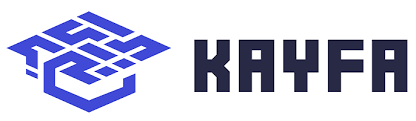

# *Data Anlaysis (Salaries Analysis)*

## Today's Outline
- Full Data Analysis Case-study
    - Salaries Analysis

## Case-study: Salaries EDA

This dataset can be found on Kaggle:
https://www.kaggle.com/kaggle/sf-salaries

#### Import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Read Salaries.csv as a dataframe

In [3]:
data = pd.read_csv('salaries.csv')
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

#### Check the head of the DataFrame

In [ ]:
data.head(5)

#### info() method to find out how many entries there are

In [ ]:
data.info()

#### isna() and drop() to handle null values in the dataset 

In [ ]:
data.isna().sum()

In [ ]:
data.drop(['Status', 'Notes'],axis=1, inplace=True)

In [ ]:
data.isna().sum()

In [ ]:
data['BasePay']=data['BasePay'].fillna(value=data['BasePay'].mean())

In [ ]:
data['Benefits']=data['Benefits'].fillna(value=data['Benefits'].mean())

In [ ]:
EmptyIndex =[]
for c in data.columns :
    if data[c].isna().sum() == 4 :
        EmptyIndex.extend(list(np.where(data[c].isnull())[0]) )
print(list(EmptyIndex))

In [ ]:
list(np.where(data['OtherPay'].isnull())[0])

In [ ]:
list(np.where(data['OvertimePay'].isnull())[0])

In [ ]:
data.drop(list(np.where(data['OtherPay'].isnull())[0]),axis=0,inplace=True)

In [ ]:
data.reset_index(inplace=True)
if 'index' in data.columns :
    data.drop (['index'],axis=1,inplace=True)

In [ ]:
data.isna().sum()

#### duplicated() to find duplicated values

In [ ]:
data.duplicated().sum()

#### What is the average BasePay ?

In [ ]:
data.BasePay.mean()

#### What is the highest amount of OvertimePay in the dataset ?

In [ ]:
data.OvertimePay.max()

#### What is the job title of JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).

In [ ]:
data[data['EmployeeName']=="JOSEPH DRISCOLL"]['JobTitle'].to_frame()

#### How much does JOSEPH DRISCOLL make (including benefits)?

In [ ]:
data[data['EmployeeName']=="JOSEPH DRISCOLL"]['TotalPayBenefits'].to_frame()

#### What is the name of highest paid person (including benefits)?

In [ ]:
data[data['TotalPayBenefits']==data['TotalPayBenefits'].max()]

#### What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?

In [ ]:
data[data['TotalPayBenefits']==data['TotalPayBenefits'].min()]

In [ ]:
lowest_paid_person = data.sort_values(by='TotalPayBenefits').iloc[0]

print("Name of the lowest-paid person:", lowest_paid_person['EmployeeName'])
print("TotalPayBenefits:", lowest_paid_person['TotalPayBenefits'])

#### What was the average (mean) BasePay of all employees per year? (2011-2014) ?

In [ ]:
data.groupby('Year')['BasePay'].mean().to_frame()

In [ ]:
average_base_pay_per_year = data.groupby('Year')['BasePay'].mean()

# Plot the data
average_base_pay_per_year.plot(kind='line', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average BasePay')
plt.title('Average BasePay per Year (2011-2014)')
plt.show()

#### How many unique job titles are there?

In [ ]:
data['JobTitle'].nunique()

#### What are the top 5 most common jobs?

In [ ]:
job_counts = data['JobTitle'].value_counts()
job_counts.head(5).to_frame()

#### How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)

In [ ]:
data_2013 = data[data['Year'] == 2013]

# Count the occurrences of each job title in 2013
job_counts_2013 = data_2013['JobTitle'].value_counts()

# Count the number of job titles with only one occurrence in 2013
job_titles_single_occurrence = job_counts_2013[job_counts_2013 == 1]

num_job_titles_single_occurrence = len(job_titles_single_occurrence)

print("Number of job titles represented by only one person in 2013:", num_job_titles_single_occurrence)

In [ ]:
sum(data[data['Year']==2013]['JobTitle'].value_counts() == 1)

#### How many people have the word Chief in their job title? (This is pretty tricky)

In [ ]:
# Assuming 'data' is your DataFrame containing the job titles
# 'JobTitle' column represents the job title for each employee

# Convert all job titles to lowercase for case-insensitive comparison
data['JobTitle'] = data['JobTitle'].str.lower()

# Count the number of job titles containing the word "chief"
num_people_with_chief = data[data['JobTitle'].str.contains('chief')]['JobTitle'].count()

print("Number of people with 'Chief' in their job title:", num_people_with_chief)

#### Bonus: Is there a correlation between length of the Job Title string and Salary?

In [ ]:
# Calculate the length of each job title string
data['JobTitle_Length'] = data['JobTitle'].str.len()

# Compute the correlation coefficient between job title length and salary
data[['JobTitle_Length','TotalPayBenefits']].corr()


In [ ]:
correlation_matrix = data[['JobTitle_Length', 'TotalPayBenefits']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Job Title Length and TotalPayBenefits')
plt.show()
